In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [8]:
df.index.freq='MS'

In [10]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [12]:
df.tail()

Thousands of Passengers
Month                              
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

In [18]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [41]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend ='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [45]:
test_predictions = fitted_model.forecast(36)

In [49]:
test_predictions

1958-02-01    339.142939
1958-03-01    399.281668
1958-04-01    394.233601
1958-05-01    402.545259
1958-06-01    473.128747
1958-07-01    521.795327
1958-08-01    514.513654
1958-09-01    446.216872
1958-10-01    385.430997
1958-11-01    339.645141
1958-12-01    381.455703
1959-01-01    401.210220
1959-02-01    387.159215
1959-03-01    455.812459
1959-04-01    450.049680
1959-05-01    459.538113
1959-06-01    540.114899
1959-07-01    595.671753
1959-08-01    587.359132
1959-09-01    509.392807
1959-10-01    440.000793
1959-11-01    387.732519
1959-12-01    435.462672
1960-01-01    458.014058
1960-02-01    441.973694
1960-03-01    520.346949
1960-04-01    513.768269
1960-05-01    524.600086
1960-06-01    616.585033
1960-07-01    680.007694
1960-08-01    670.518163
1960-09-01    581.513269
1960-10-01    502.296648
1960-11-01    442.628167
1960-12-01    497.116014
1961-01-01    522.860254
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

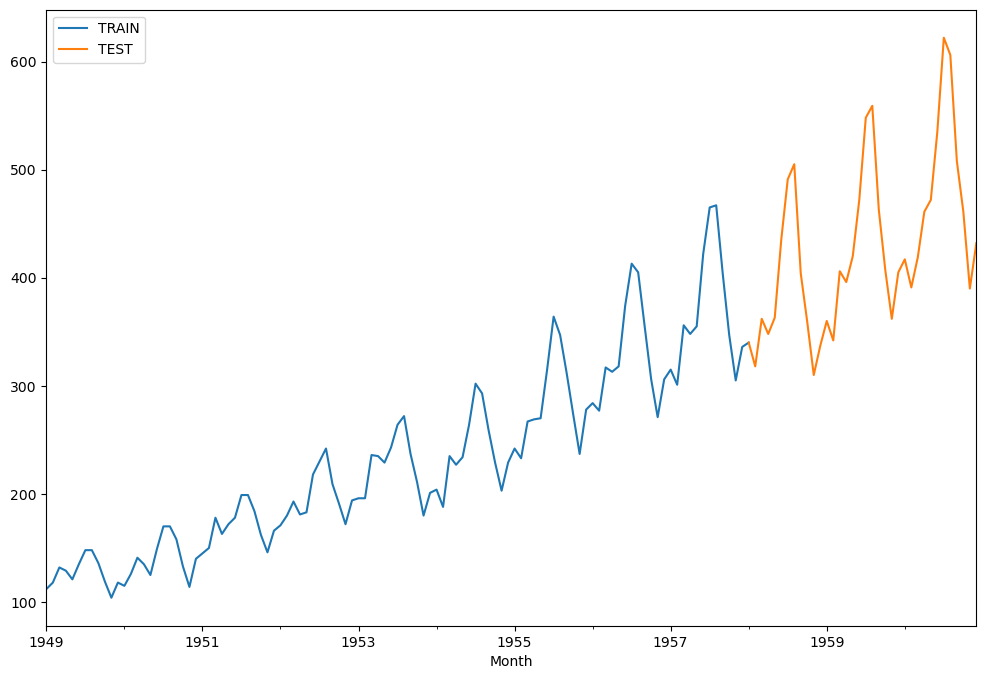

In [57]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')
test_predictions.plot(legend=